<a href="https://colab.research.google.com/github/bryandelgado99/Fundamentos-de-IA/blob/main/Deber_3__Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deber 3 -  Redes Neuronales
## Nombre: Bryan Delgado
## Fecha: 24-12-2023

El propósito de esta tarea es entrenar un modelo de redes neuronales que pueda predecir el precio de una casa en función de diversas características.

El conjunto de datos está en formato .csv y contiene las siguientes columnas:
-	*Price* (Precio de la casa): Esta es la variable objetivo que queremos predecir. Representa el precio de una casa.
-	*Crime_rate* (Tasa de criminalidad): Indica la tasa de criminalidad en la zona.
-	*Resid_area* (Área residencial): Representa el tamaño del área residencial en la que se encuentra la casa.
-	*Air_qual* (Calidad del aire): Mide la calidad del aire en la zona.
-	*Room_num* (Número de habitaciones): Indica la cantidad de habitaciones en la casa.
-	*Age* (Edad): Representa la antigüedad de la casa en años.
-	*Dist1, Dist2, Dist3, Dist4* (Distancias a puntos específicos): Estas columnas representan distancias a diferentes puntos de interés o servicios en la zona. Estos puntos podrían incluir escuelas, centros comerciales, parques, etc.
-	*Airport* (Aeropuerto): Una variable categórica que indica si hay un aeropuerto cercano (1:"YES") o no (0:"NO").


In [47]:
# 0. Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Leemos el archivo CSV
archivo = pd.read_csv("/content/precio.csv")
print(archivo.head())

   price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  airport  
0   4.18   4.01        1  
1   5.12   5.06        0  
2   5.01   4.97        0  
3   6.16   5.96        1  
4   6.37   5.86        0  


In [37]:
# 2. Separamos los datos de entrada y salida
x = archivo[['crime_rate', 'resid_area', 'air_qual', 'room_num', 'age', 'dist1', 'dist2', 'dist3', 'dist4', 'airport']]
y = archivo[['price']]

#x = archivo.iloc[:,:0]
#y = archivo.iloc[:, 0] #Primera columna

In [39]:
# 3. Dividimos datos en aprendizaje y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [40]:
# 4. Creamos las capas del modelo, mediante las unidades de cómputo y los elementos
# La capa de entrada toma los valores de X y los analiza, tomando comportamientos comunes
capa_entrada = tf.keras.layers.Dense(units=1, input_shape=[10]) #Las input_shapes corresponden a los elementos de X obtenidos en el paso 3
# La capa de salida presenta la predicción analítica final de las capas anteriores
capa_salida = tf.keras.layers.Dense(units=1)
# Las capa ocultas procesan la información y las une en partes comunes, para facilitar el tratamiento del modelo
capa_oculta_A = tf.keras.layers.Dense(units=5)
capa_oculta_B = tf.keras.layers.Dense(units=5)
# Definición del modelo
modelo = tf.keras.Sequential([capa_entrada, capa_oculta_A, capa_oculta_B, capa_salida])

In [41]:
# 5. Definimos el modelo con Tensorflow - Keras y lo compilamos mediante 'adams'
modelo.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# 5. Entrenamos el modelo con una base de epochs de 100
historial = modelo.fit(x_train, y_train, epochs=10, batch_size=10)
print(historial)

Epoch 1/10
36/36 [==============================] - 1s 2ms/step - loss: 676.7922
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 345.1153
Epoch 3/10
36/36 [==============================] - 0s 2ms/step - loss: 186.8729
Epoch 4/10
36/36 [==============================] - 0s 2ms/step - loss: 166.8046
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 159.7507
Epoch 6/10
36/36 [==============================] - 0s 2ms/step - loss: 154.2161
Epoch 7/10
36/36 [==============================] - 0s 2ms/step - loss: 150.5525
Epoch 8/10
36/36 [==============================] - 0s 2ms/step - loss: 145.1613
Epoch 9/10
36/36 [==============================] - 0s 2ms/step - loss: 140.4030
Epoch 10/10
36/36 [==============================] - 0s 2ms/step - loss: 136.6855


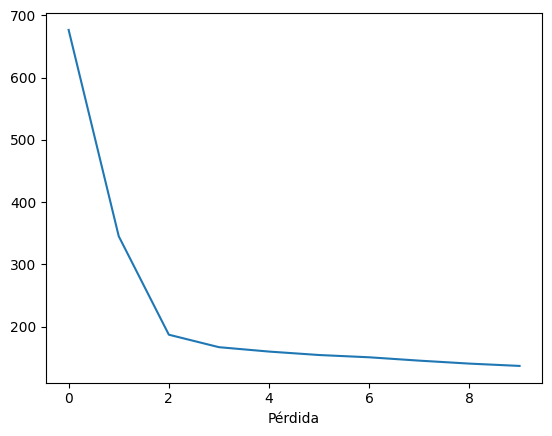

In [60]:
# 5.5 Gráfica para función de pérdida
plt.plot(historial.history["loss"])
x = plt.xlabel("Pérdida")

In [43]:
# 8. Evaluamos el modelo y definimos la pérdida de datos
perdida =  modelo.evaluate(x_train, y_train)
print(f"La pérdida obtenida es de: {perdida}")

12/12 [==============================] - 0s 3ms/step - loss: 133.9950
La pérdida obtenida es de: 133.9950408935547


#Ejercicios de Comprobación y Rendimiento
Para este caso, se emplearán ejercicios con casos, y elementos correspondientes a cada componente, para analizar la efectividad del modelo de red neuronal.

-	Caso 1:  
  -	Tasa de criminalidad: 0.03
  -	Área residencial: 35.0
  -	Calidad del aire: 0.45
  -	Número de habitaciones: 7.0
  -	Edad de la casa: 30.0
  -	Distancia a punto 1: 5.0
  -	Distancia a punto 2: 4.8
  -	Distancia a punto 3: 5.2
  -	Distancia a punto 4: 5.0
  -	Aeropuerto cercano: Sí


In [55]:
data_x = np.array([[0.03, 35.0, 0.45, 7.0, 30.0, 5.0, 4.8, 5.2, 5.0, 1]])

prediccion = modelo.predict([data_x])
print(f"La predicción del Caso A es: {prediccion}")

1/1 [==============================] - 0s 38ms/step
La predicción del Caso A es: [[14.252769]]


-	Caso 2:
  - Tasa de criminalidad: 0.02
  - Área residencial: 40.0
  - Calidad del aire: 0.50
  - Número de habitaciones: 6.0
  - Edad de la casa: 20.0
  - Distancia a punto 1: 4.0
  - Distancia a punto 2: 4.2
  - Distancia a punto 3: 4.8
  - Distancia a punto 4: 4.5
  - Aeropuerto cercano: No


In [56]:
data_x = np.array([[0.02, 40, 0.50, 6, 20, 4, 4.2, 4.8, 4.5, 0]])

prediccion = modelo.predict([data_x])
print(f"La predicción del Caso A es: {prediccion}")

1/1 [==============================] - 0s 22ms/step
La predicción del Caso A es: [[9.597738]]


- Caso 3:
  -	Tasa de criminalidad: 0.05
  -	Área residencial: 30.0
  -	Calidad del aire: 0.40
  -	Número de habitaciones: 8.0
  -	Edad de la casa: 40.0
  -	Distancia a punto 1: 6.0
  -	Distancia a punto 2: 5.5
  -	Distancia a punto 3: 6.2
  -	Distancia a punto 4: 6.0
  -	Aeropuerto cercano: Sí


In [57]:
data_x = np.array([[0.05, 30, 0.40, 8, 40, 6, 5.5, 6.2, 6, 1]])

prediccion = modelo.predict([data_x])
print(f"La predicción del Caso A es: {prediccion}")

1/1 [==============================] - 0s 37ms/step
La predicción del Caso A es: [[19.304811]]
